In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from src.data_utils import load_crossover

In [2]:
distances = load_crossover()
distances

,representation,parent_id_1,parent_id_2,child_intent,frechet,procrustes_frechet,frechet_norm,procrustes_frechet_norm
0,bezier,18627,58699,0,40.715064,41.764532,0.232071,0.238053
1,bezier,18627,58699,0,42.744127,42.812037,0.247887,0.248281
2,bezier,18627,58699,0,60.049768,60.362316,0.342276,0.344058
3,bezier,18627,58699,0,62.078831,62.272591,0.360015,0.361139
4,bezier,18627,58699,1,44.469992,47.176743,0.253474,0.268902
...,...,...,...,...,...,...,...,...
593995,theta+step,9787,17566,3,59.882233,71.956347,0.326817,0.392714
593996,theta+step,9787,17566,4,73.888356,80.353442,0.425485,0.462714
593997,theta+step,9787,17566,4,44.383345,59.308472,0.242229,0.323686
593998,theta+step,9787,17566,4,70.037588,79.122804,0.392896,0.443863


In [3]:
from src.plots import plot_distances

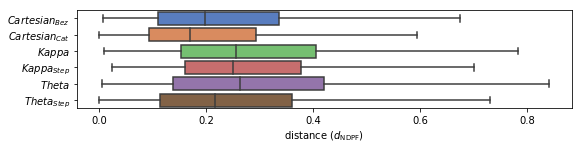

In [4]:
fig = plot_distances(distances)
fig.savefig('./figures/crossover.pdf')

## Statistical Test

In [5]:
subject = {}
for rep in distances.representation.unique():
    subject[rep] = distances[distances.representation==rep]['procrustes_frechet_norm']

### Shapiro

In [6]:
from scipy.stats import shapiro
# null hypothesis: is it equal to normal distribution
# alternative: is not... 

ci = 0.05 # less than ci --> reject null hypothesis 

for rep in distances.representation.unique():
    shapiro_rep = shapiro(subject[rep])
    label = '' if shapiro_rep.pvalue < ci else '(Normal)'
    print(f'{rep}: {shapiro_rep.pvalue} {label}')

bezier: 0.0 
cartesian: 0.0 
kappa: 0.0 
kappa+step: 0.0 
theta: 0.0 
theta+step: 0.0 


/Users/ezecastellano/PycharmProjects/sbst-tool-competition-av/venv3.7/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### U-Test with A12

In [7]:
from src.stats_tests import u_test_by_representations, u_test_a12_by_representation, pretty_latex

In [8]:
test = u_test_by_representations(subject, distances.representation.unique())
test

,bezier,cartesian,kappa,kappa+step,theta,theta+step
subject,,,,,,
bezier,NaN,0.0,0.0,0.000000e+00,0.000000,5.806993e-52
cartesian,NaN,NaN,0.0,0.000000e+00,0.000000,0.000000e+00
kappa,NaN,NaN,NaN,9.833007e-07,0.000833,0.000000e+00
kappa+step,NaN,NaN,NaN,NaN,0.029608,0.000000e+00
theta,NaN,NaN,NaN,NaN,NaN,0.000000e+00
theta+step,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test = u_test_a12_by_representation(subject, distances.representation.unique())
test